In [1]:
#importing all neccesary libaries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import numpy as np
import sklearn
%matplotlib inline


In [2]:
#import dataset
insurance = pd.read_csv(r'C:\Users\surfacepro\.ipython\insurance.csv')


In [3]:
#Viewing the firs five rows of data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

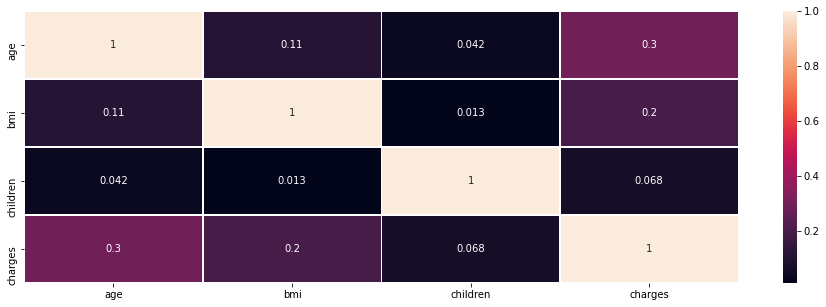

In [5]:

plt.figure(figsize = (16,5))
#annotated the the entries
sns.heatmap(insurance.corr(), annot= True, linewidths=.5)


In [6]:
dummies1 =pd.get_dummies(insurance)
dummies1

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [7]:
#dropping orginal columns and one column to avoid dummy trap variable
df=dummies1.drop(['smoker_no','sex_male', 'region_southwest'], axis= 'columns')
df

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast
0,19,27.900,0,16884.92400,1,1,0,0,0
1,18,33.770,1,1725.55230,0,0,0,0,1
2,28,33.000,3,4449.46200,0,0,0,0,1
3,33,22.705,0,21984.47061,0,0,0,1,0
4,32,28.880,0,3866.85520,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,1,0,0
1335,18,36.850,0,1629.83350,1,0,0,0,1
1336,21,25.800,0,2007.94500,1,0,0,0,0


In [8]:
df.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
dtype: object

In [9]:

X = df.drop(['charges'], axis= 'columns')
y = df.charges

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [11]:
 regression= LinearRegression().fit(X_train, y_train)


In [12]:
#training score
regression.score(X_train, y_train)


0.7430471855293475

In [13]:
#Testing score
regression.score(X_test, y_test)

0.778109660422383

In [14]:
regression.coef_

array([2.56942952e+02, 3.37679317e+02, 5.52841582e+02, 2.53532774e+02,
       2.36601049e+04, 8.45699694e+02, 9.02015969e+02, 2.65785695e-01])

In [15]:
regression.intercept_

-13091.451106609078

In [17]:
y_pred= regression.predict(X_test)

In [18]:
#Calculating R-squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.778109660422383